# Home Credit Default Risk

## 0. ライブラリ・データの読み込み

In [ ]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd "/content/drive/MyDrive/GCI2023/02.（公開）コンペ2 (1)"
#/content/drive/MyDrive/GCI2023/02.（公開）コンペ2

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/GCI2023/02.（公開）コンペ2 (1)


In [ ]:
# データの読み込み
INPUT_DIR = "./input/"

train = pd.read_csv(INPUT_DIR + "train.csv")
test = pd.read_csv(INPUT_DIR + "test.csv")
sample_sub = pd.read_csv(INPUT_DIR + "sample_submission.csv")

## 1. データの可視化と分析

In [ ]:
# trainデータの確認
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 51)


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0       0         Cash loans           F            N   
1           1       0         Cash loans           F            N   
2           2       0         Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               N             0          112500.0    755190.0      36328.5   
1               Y             0          225000.0    585000.0      16893.0   
2               Y             0           54000.0    334152.0      18256.5   

   ...  EXT_SOURCE_3 OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...           NaN                      0.0                      0.0   
1  ...      0.553165                      0.0                      0.0   
2  ...           NaN                      4.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE DAYS_LAST_PHONE_CHANGE  \
0                      0.0                      0.0                 -292.0   
1                      0.0                      0.0                 -617.0   
2                      4.0                      0.0                 -542.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
0                         NaN                        NaN   
1                         0.0                        0.0   
2                         NaN                        NaN   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        NaN                         NaN  
1                        0.0                         1.0  
2                        NaN                         NaN  

[3 rows x 51 columns]

In [ ]:
# testデータの確認
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 50)


SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
0      171202         Cash loans           F            N               N   
1      171203         Cash loans           F            N               N   
2      171204         Cash loans           F            N               Y   

   CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
0             1          144000.0    961146.0      28233.0         688500.0   
1             0          103500.0    296280.0      16069.5         225000.0   
2             1          180000.0    183694.5      11236.5         139500.0   

   ... EXT_SOURCE_3 OBS_30_CNT_SOCIAL_CIRCLE DEF_30_CNT_SOCIAL_CIRCLE  \
0  ...          NaN                      2.0                      0.0   
1  ...          NaN                      5.0                      0.0   
2  ...     0.389339                      7.0                      0.0   

  OBS_60_CNT_SOCIAL_CIRCLE DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  \
0                      2.0                      0.0                    -1.0   
1                      5.0                      0.0                  -212.0   
2                      7.0                      0.0                  -428.0   

   AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_MON  \
0                         NaN                        NaN   
1                         NaN                        NaN   
2                         0.0                        1.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        NaN                         NaN  
1                        NaN                         NaN  
2                        1.0                         1.0  

[3 rows x 50 columns]

In [ ]:
# 5種類の特徴量に絞る
use_features = ["NAME_CONTRACT_TYPE", "AMT_INCOME_TOTAL", "EXT_SOURCE_2", "OWN_CAR_AGE", "ORGANIZATION_TYPE"]
target = train["TARGET"].values

train = train[use_features]
train["TARGET"] = target
test = test[use_features]

In [ ]:
# trainデータの確認
print(f"train shape: {train.shape}")
train.head(3)

train shape: (171202, 6)


NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  EXT_SOURCE_2  OWN_CAR_AGE  \
0         Cash loans          112500.0      0.372591          NaN   
1         Cash loans          225000.0      0.449567          NaN   
2         Cash loans           54000.0      0.569503          NaN   

  ORGANIZATION_TYPE  TARGET  
0            School       0  
1               XNA       0  
2            Postal       0

In [ ]:
# testデータの確認
print(f"test shape: {test.shape}")
test.head(3)

test shape: (61500, 5)


NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  EXT_SOURCE_2  OWN_CAR_AGE  \
0         Cash loans          144000.0      0.720416          NaN   
1         Cash loans          103500.0      0.287306          NaN   
2         Cash loans          180000.0      0.352456          NaN   

  ORGANIZATION_TYPE  
0      Kindergarten  
1            School  
2     Trade: type 7

### 1.2 データの可視化・分析(EDA)


#### 1.2.1 欠損値の確認


In [ ]:
# trainの欠損値を確認
train.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2             369
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
TARGET                     0
dtype: int64

In [ ]:
# testの欠損値を確認
test.isnull().sum()

NAME_CONTRACT_TYPE        0
AMT_INCOME_TOTAL          0
EXT_SOURCE_2            130
OWN_CAR_AGE           40909
ORGANIZATION_TYPE         0
dtype: int64

#### 1.2.2 各特徴量の可視化・分析


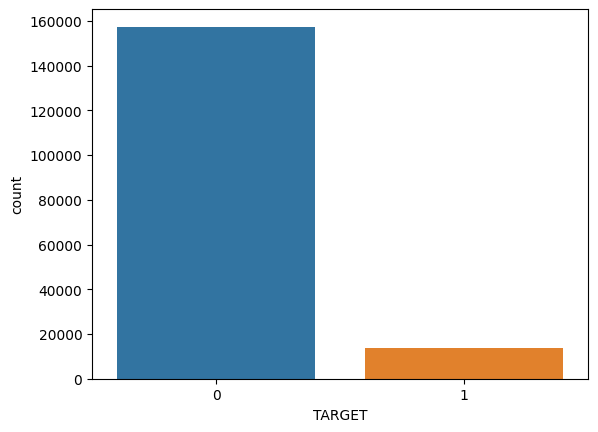

In [ ]:
# 目的変数（債務不履行かどうか）の分布
sns.countplot(data=train, x="TARGET")
plt.show()

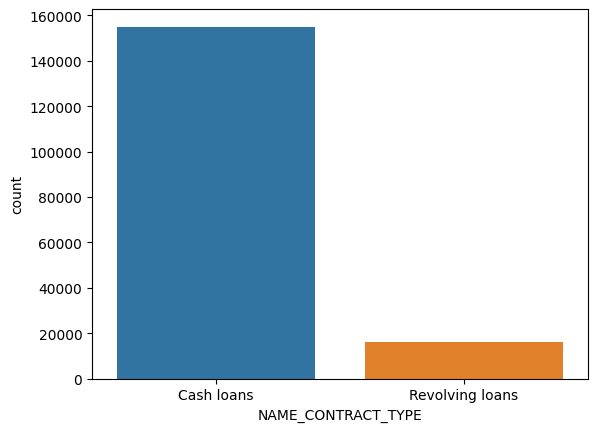

In [ ]:
# NAME_CONTRACT_TYPEの分布
sns.countplot(data=train, x="NAME_CONTRACT_TYPE")
plt.show()

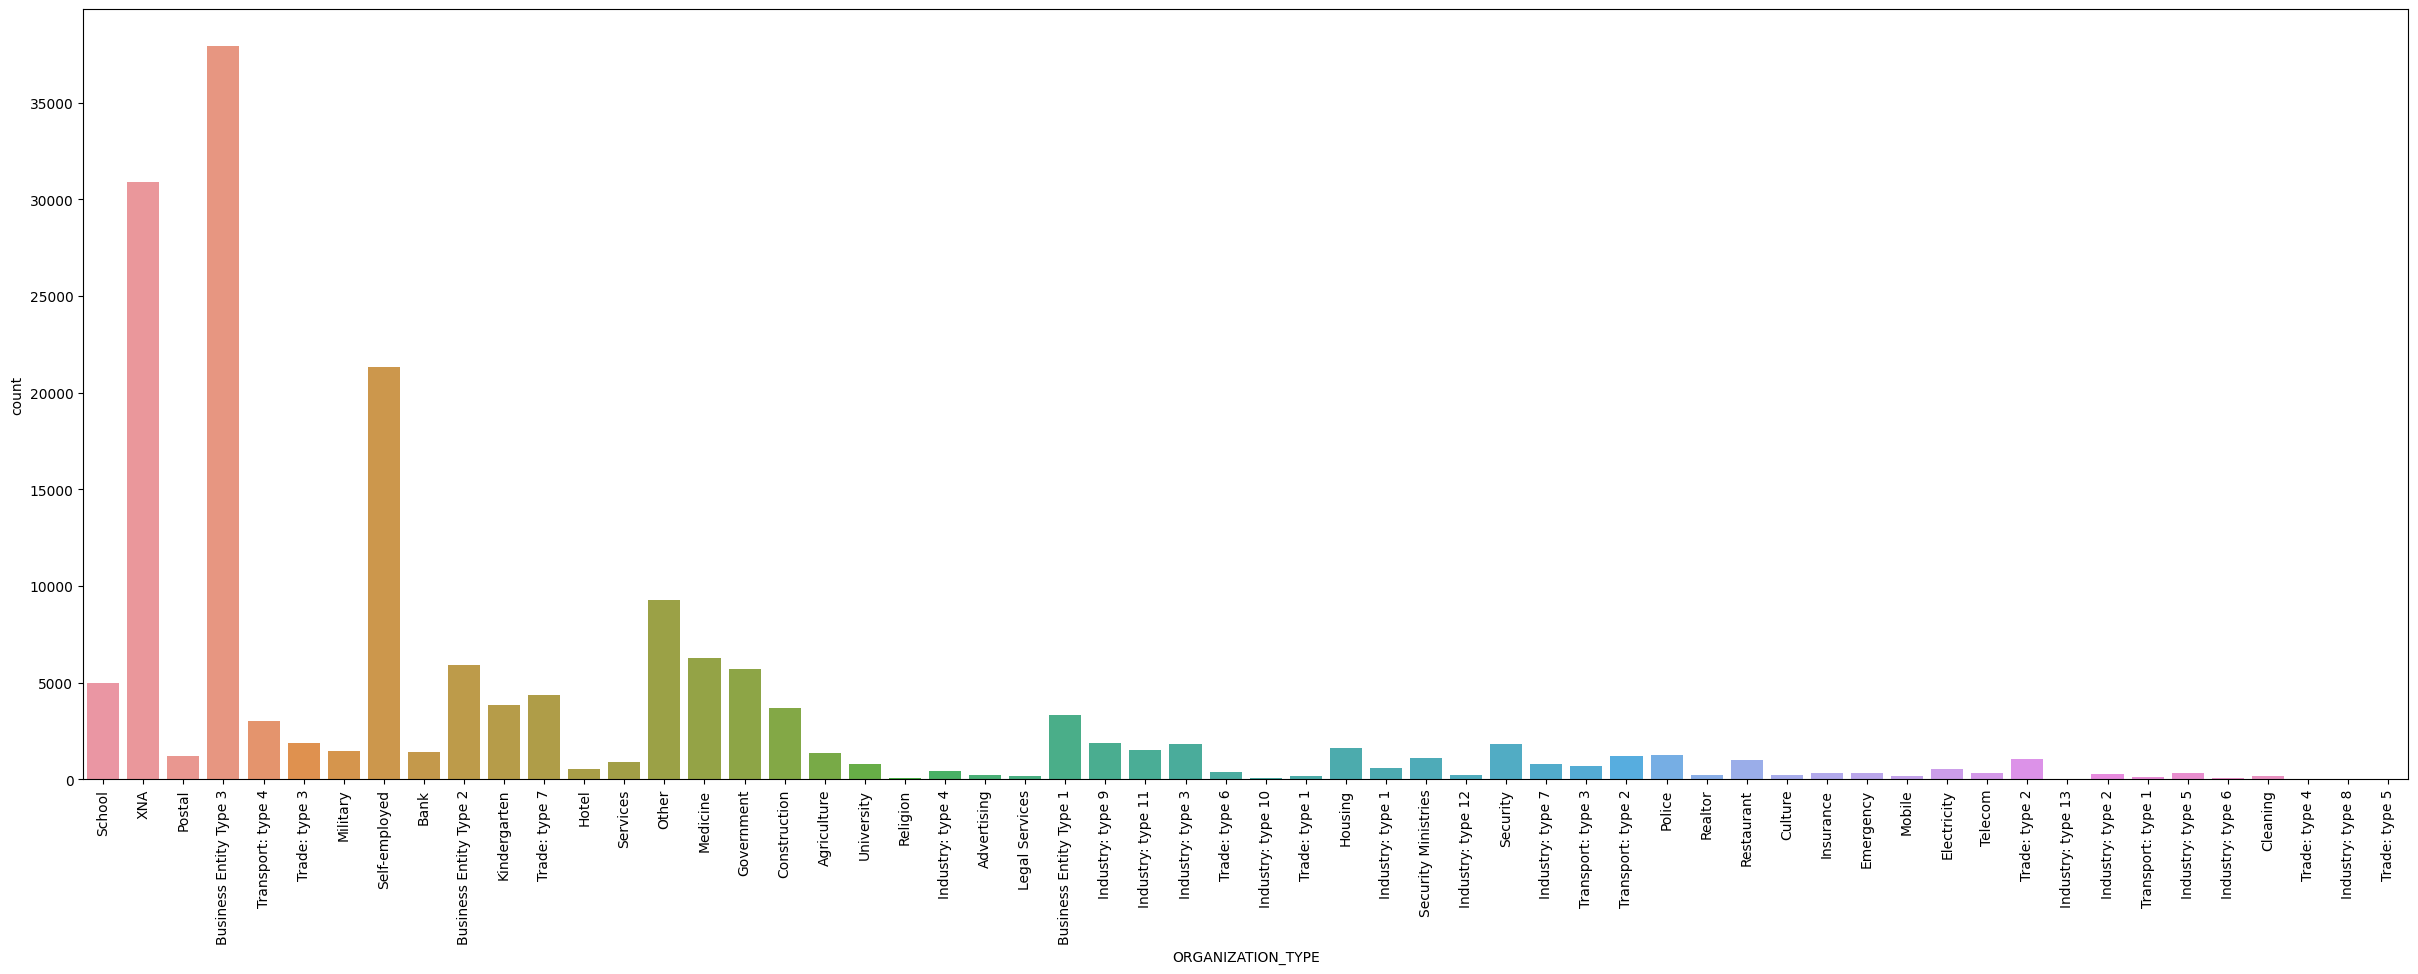

In [ ]:
# ORGANIZATION_TYPEの分布
plt.figure(figsize=(30, 10))
sns.countplot(data=train, x="ORGANIZATION_TYPE")
plt.tick_params(axis="x", rotation=90)
plt.show()

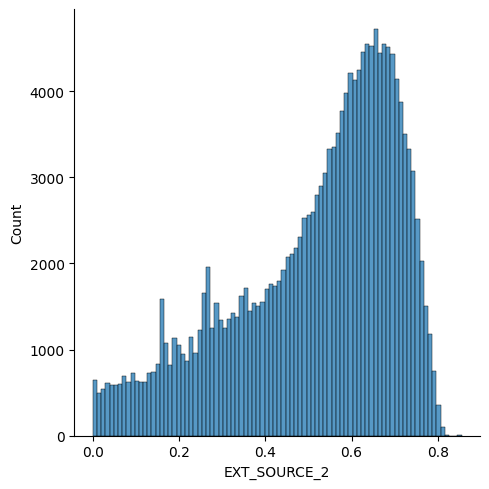

In [ ]:
# EXT_SOURCE_2の分布
sns.displot(data=train, x="EXT_SOURCE_2")
plt.show()

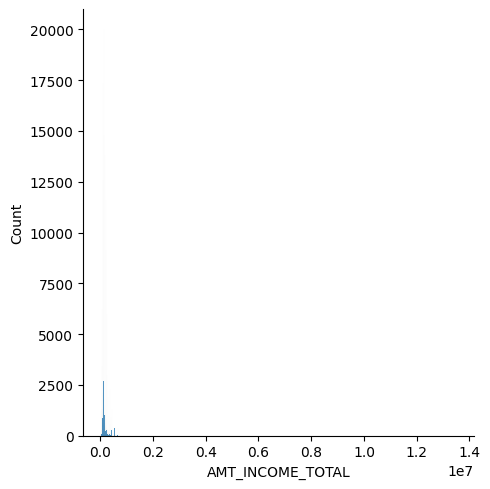

In [ ]:
# AMT_INCOME_TOTALの分布
sns.displot(data=train, x="AMT_INCOME_TOTAL")
plt.show()

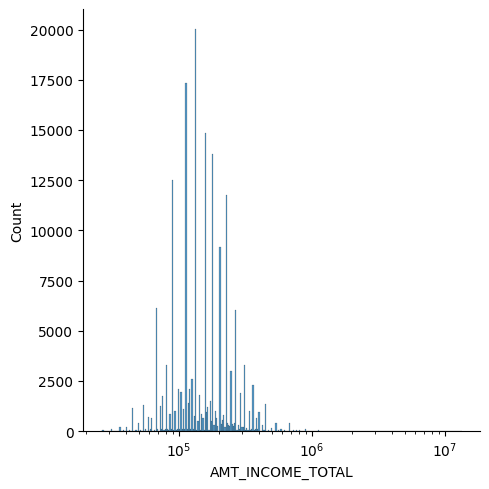

In [ ]:
# AMT_INCOME_TOTALの分布（対数変換）
sns.displot(data=train, x="AMT_INCOME_TOTAL", log_scale=10)
plt.show()

In [ ]:
# AMT_INCOME_TOTALの値の種類を確認
len(train["AMT_INCOME_TOTAL"].unique())

1641

In [ ]:
# AMT_INCOME_TOTALの上位10個
train["AMT_INCOME_TOTAL"].value_counts().head(10)

135000.0    19969
112500.0    17320
157500.0    14772
180000.0    13791
90000.0     12481
225000.0    11573
202500.0     9128
67500.0      6130
270000.0     6006
81000.0      3295
Name: AMT_INCOME_TOTAL, dtype: int64

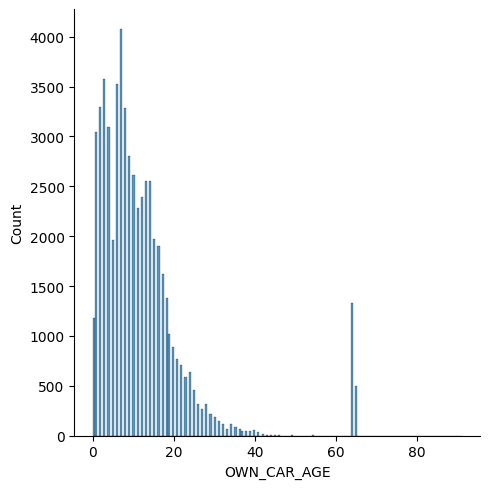

In [ ]:
# OWN_CAR_AGEの分布
sns.displot(data=train, x="OWN_CAR_AGE")
plt.show()

## 2. 前処理と特徴量作成

In [ ]:
# EXT_SOURCE_2の欠損値を平均値で補完
train["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True)
test["EXT_SOURCE_2"].fillna(train["EXT_SOURCE_2"].mean(), inplace=True)

train.isnull().sum()

NAME_CONTRACT_TYPE         0
AMT_INCOME_TOTAL           0
EXT_SOURCE_2               0
OWN_CAR_AGE           112992
ORGANIZATION_TYPE          0
TARGET                     0
dtype: int64

In [ ]:
# NAME_CONTRACT_TYPEの数値化（Label Encoding）
train["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)
test["NAME_CONTRACT_TYPE"].replace({'Cash loans': 0, 'Revolving loans': 1}, inplace=True)

train.head(5)

NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  EXT_SOURCE_2  OWN_CAR_AGE  \
0                   0          112500.0      0.372591          NaN   
1                   0          225000.0      0.449567          NaN   
2                   0           54000.0      0.569503          NaN   
3                   0           67500.0      0.105235          NaN   
4                   0          157500.0      0.202490          NaN   

        ORGANIZATION_TYPE  TARGET  
0                  School       0  
1                     XNA       0  
2                  Postal       0  
3                     XNA       0  
4  Business Entity Type 3       1

In [ ]:
# ORGANIZATION_TYPEの数値化（Count Encoding）
organization_ce = train["ORGANIZATION_TYPE"].value_counts()
train["ORGANIZATION_TYPE"] = train["ORGANIZATION_TYPE"].map(organization_ce)
test["ORGANIZATION_TYPE"] = test["ORGANIZATION_TYPE"].map(organization_ce)

train.head(5)

NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  EXT_SOURCE_2  OWN_CAR_AGE  \
0                   0          112500.0      0.372591          NaN   
1                   0          225000.0      0.449567          NaN   
2                   0           54000.0      0.569503          NaN   
3                   0           67500.0      0.105235          NaN   
4                   0          157500.0      0.202490          NaN   

   ORGANIZATION_TYPE  TARGET  
0               4991       0  
1              30898       0  
2               1185       0  
3              30898       0  
4              37943       1

In [ ]:
# OWN_CAR_AGEの60以上の値（外れ値）を欠損値扱いする
train.loc[train["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan
test.loc[test["OWN_CAR_AGE"] >= 60, "OWN_CAR_AGE"] = np.nan

In [ ]:
# OWN_CAR_AGEをグループ分け
train["OWN_CAR_AGE"] = train["OWN_CAR_AGE"] // 10
test["OWN_CAR_AGE"] = test["OWN_CAR_AGE"] // 10

train["OWN_CAR_AGE"].unique()

array([nan,  0.,  2.,  1.,  3.,  4.,  5.])

In [ ]:
# OWN_CAR_AGEをOne Hot Encoding
train_car_age_ohe = pd.get_dummies(train["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")
test_car_age_ohe = pd.get_dummies(test["OWN_CAR_AGE"]).add_prefix("OWN_CAR_AGE_")

train = pd.concat([train, train_car_age_ohe], axis=1)
test = pd.concat([test, test_car_age_ohe], axis=1)

train.drop('OWN_CAR_AGE', axis=1, inplace=True)
test.drop('OWN_CAR_AGE', axis=1, inplace=True)

train.head(5)

NAME_CONTRACT_TYPE  AMT_INCOME_TOTAL  EXT_SOURCE_2  ORGANIZATION_TYPE  \
0                   0          112500.0      0.372591               4991   
1                   0          225000.0      0.449567              30898   
2                   0           54000.0      0.569503               1185   
3                   0           67500.0      0.105235              30898   
4                   0          157500.0      0.202490              37943   

   TARGET  OWN_CAR_AGE_0.0  OWN_CAR_AGE_1.0  OWN_CAR_AGE_2.0  OWN_CAR_AGE_3.0  \
0       0                0                0                0                0   
1       0                0                0                0                0   
2       0                0                0                0                0   
3       0                0                0                0                0   
4       1                0                0                0                0   

   OWN_CAR_AGE_4.0  OWN_CAR_AGE_5.0  
0                0                0  
1                0                0  
2                0                0  
3                0                0  
4                0                0

## 3. 機械学習モデルの作成


必要なライブラリ：

- train_test_split：データを訓練用データと評価用データに分割する。
- StandardScaler：データを標準化する。
- roc_auc_score：今回の評価指標であるAUCを計算する。

In [ ]:
# ライブラリの読み込み
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [ ]:
# 目的変数と説明変数に分割
X = train.drop("TARGET", axis=1).values
y = train["TARGET"].values
X_test = test.values

In [ ]:
# 標準化
sc = StandardScaler()
sc.fit(X)
X_std = sc.transform(X)
X_test_std = sc.transform(X_test)

In [ ]:
# 訓練データと評価データに分割
X_train, X_valid, y_train, y_valid = train_test_split(X_std, y, test_size=0.3, stratify=y, random_state=0)

In [ ]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lr_valid_pred)}")

Train Score: 0.6617244589454646
Valid Score: 0.6630685833844308


In [ ]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, mlp_valid_pred)}")

Train Score: 0.6758258246974346
Valid Score: 0.6696073973482656


つぎに、勾配ブースティング木（GBDT）モデルを作成する。
GBDTの特徴：
- 欠損値のあるデータを学習できる。
- 標準化などの値のスケーリングが不要。
- 精度が高い。
- 特徴量間の相互作用が反映される。
- 特徴量が多くても精度が落ちにくく、速度が速い。


In [ ]:
# XGBClassifier
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=0)
xgb.fit(X_train, y_train)

xgb_train_pred = xgb.predict_proba(X_train)[:, 1]
xgb_valid_pred = xgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, xgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, xgb_valid_pred)}")

Train Score: 0.7646748296826761
Valid Score: 0.654550753884773


In [ ]:
# LGBMClassifier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_valid)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, lgb_valid_pred)}")

[LightGBM] [Info] Number of positive: 9675, number of negative: 110166
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.011180 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 571
[LightGBM] [Info] Number of data points in the train set: 119841, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080732 -> initscore=-2.432443
[LightGBM] [Info] Start training from score -2.432443
Train Score: 0.7235077072555903
Valid Score: 0.6694850623021139


In [ ]:
train_pred = (lr_train_pred + mlp_train_pred + lgb_train_pred + xgb_train_pred)/4
valid_pred = (lr_valid_pred + mlp_valid_pred + lgb_valid_pred + xgb_valid_pred)/4

print(f"Train Score: {roc_auc_score(y_train, train_pred)}")
print(f"Valid Score: {roc_auc_score(y_valid, valid_pred)}")

Train Score: 0.7253468618018353
Valid Score: 0.6705849742883124


## 4. 予測結果の作成


In [ ]:
# テストデータに対する予測値の作成
pred = xgb.predict_proba(X_test)[:, 1]

In [ ]:
# 予測結果を提出用のフォーマットに格納
sample_sub['TARGET'] = pred
sample_sub

SK_ID_CURR    TARGET
0          171202  0.019049
1          171203  0.087228
2          171204  0.099022
3          171205  0.072744
4          171206  0.064021
...           ...       ...
61495      232697  0.029628
61496      232698  0.019696
61497      232699  0.021762
61498      232700  0.044262
61499      232701  0.048047

[61500 rows x 2 columns]

In [ ]:
# 提出用のcsvファイルを作成
sample_sub.to_csv('submission.csv',index=False)
#INPUT_DIR + "train.csv"